# Purpose Statement

The purpose of this notebook is to create a brief reference for introductory machine learning. Thus, the lessons posted here will be 

1. Concise
2. Easily traversable; and 
3. Written in such a way that it is easily digestible. 

To the best of my ability, I will keep the mathematical notation consistent. 

### Table of Contents 

1. Introduction
2. Probability Theory 
3. Decision Theory 
4. Probability Distributions 
5. Linear Models for Regression 
6. Linear Models for Classification 
7. Sampling Methods
8. Neural Networks 
9. Mixture Models & Expectation Maximization  
10. Continuous Latent Variables 

## Introduction 


### A simple regression problem

Given some data $$f(x) = sin(x) + e$$

where e is a random, normally distributed noise that gives variation to the data. 

We can approximate this function using a polynomial function 

$$y(x, w) = w_0 + w_1x + w_2x^2 + ... + w_Mx^M $$

Or more generally, we can represent this as 

$$y(x, w) = \phi(x)*w $$

Where phi represents the basis function. Popular examples of basis functions are 

- Linear 
- Polynomial 
- Radial/ Gaussian
- Sigmoidal 
- Hyperbolic

### An introduction to a loss function 

To find the appropriate w (weights), we minimize the loss function. The loss function represents the difference between the actual and predicted values. 

$$ E(w) = \frac{1}{N} \sum^N_{n=1}l(y_i, \hat{y_i}) $$

The sum of squared errors is an example of a loss function 

$$E(w) = \frac{1}{2}\sum_{n=1}^{N}{(y_i - \hat{y_i})^2} $$

in matrix notation, this could also be interpreted as 

$$ \frac{1}{2n}(Y - \phi W)^2 $$

The interpretation of this function is "the sum of the absolute distance between the predicted value and the actual value, squared."

Note that the square results in larger deviation have larger effects on the value of the loss function. 

Other loss functions may have different characteristics. 

### An introduction to minimizing the loss function

#### Method 1 

We can minimize the function via choosing a value of w for which the E(w) is small as possible. One method is to directly solve via Normal Equations. See the derivation below: 

- $ \hat{y_i} $ is also be expressed as $\phi W$

$$ \nabla E(w) = \frac{1}{n}\phi^T(\phi W - Y) $$

By setting the derivative to 0 and rearranging, we get

$$ \phi^T\phi W = \phi^T Y $$

We can then solve for W and get the matrix containing the set of weights that minimizes the error. 

#### Method 2 

A common method of achieving this is gradient descent. The steps for gradient descent are as follows

1. Initialization - start with an initial guess for w. This could be random or based on some criteria. 
2. Calculate the gradient for that specific point. The gradient represents the vector that points in the direction of the steepest ascent. 

$$ L(w) = \frac{1}{\sigma^2}\sum_{i=1}^N(y_i - \hat{y_i})\phi(x_i)$$ 

- $\phi$ represents the matrix of basis functions 
- $x_i$ represents the data point i 
- $\hat{y_i}$ represents the modelled output of data point i 
- $y_i$ represents the real output of data point i 

3. Adjust the parameters in the opposite direction of the gradient. The rate of change of the parameters is based on the gradient and the learning rate, which can be changed according to preferences. 
4. Repeat steps 2 and 3 until convergence. 

So why does gradient descent work? 

We know that the minimum of the loss function must be a minimum where the gradient is equal to zero (for convex loss functions). Gradient descent finds the direction of steepest descent and iterates towards it, guaranteeing that we at least converge to a local minimum. 

Note that while the basic principle behind gradient descent is straightforward, there are many challenges in practice, such as: 
- Choosing an appropriate learning rate
- Avoiding getting stuck in local minima or saddle points 
- Handling the high computational cost with large data sets


### An introduction to model performance 

A common method of calculating the performance of a model is to split the available data into train and test data sets. A typical split would see 80% of the data used for training and 20% used for testing. It is important to have both training and test data sets so that we can 

1. Evaluate the model and its ability to generalize to unseen data; and
2. Avoid overfitting 

There are various methods to split the data, but the simplest method is just to get all of the indexes and randomly assign them to the test or training group. 

### An introduction to regularization as a means to reduce overfitting 

Regularization is a common method used to prevent overfitting in machine learning models by adding a penalty to the loss function. This penalty is based on the magnitude of the weights. That is, the larger the weights, the larger the penalty will be. 

Using euclidean norm of the weights as the penality (ridge), the new loss function 

$$ \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2 + λ \sum_{j=1}^pw_j^2$$ 

Find the code example below: 



In [28]:
# Import required libraries
import numpy as np 
import matplotlib.pyplot as plt 

$$f(x) = sin(x) + e$$

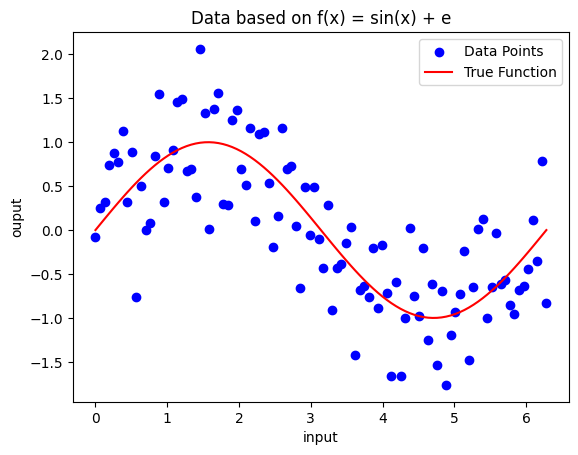

In [149]:
# Create data set 

num_points = 100 
input = np.linspace(0, 2*np.pi, num_points)
normally_distributed_variation = np.random.normal(0, 0.5, num_points)
output = np.sin(input) + normally_distributed_variation

# Plot data set 

plt.scatter(input, output, label='Data Points', color='blue')
plt.plot(input, np.sin(input), label='True Function', color='red')
plt.legend()
plt.xlabel('input')
plt.ylabel('ouput')
plt.title('Data based on f(x) = sin(x) + e')
plt.show()

### Generate polynomial input

In [150]:
def generate_polynomial_values(input, polynomial_power):
    output = []
    for value in input: 
        powers = [value**i for i in range(polynomial_power, 0, -1)]
        output.append(powers)
    return np.array(output)

In [151]:
d_input = generate_polynomial_values(input, 3)

In [152]:
d_input

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.55643068e-04, 4.02799894e-03, 6.34665183e-02],
       [2.04514455e-03, 1.61119958e-02, 1.26933037e-01],
       [6.90236284e-03, 3.62519905e-02, 1.90399555e-01],
       [1.63611564e-02, 6.44479830e-02, 2.53866073e-01],
       [3.19553835e-02, 1.00699973e-01, 3.17332591e-01],
       [5.52189027e-02, 1.45007962e-01, 3.80799110e-01],
       [8.76855724e-02, 1.97371948e-01, 4.44265628e-01],
       [1.30889251e-01, 2.57791932e-01, 5.07732146e-01],
       [1.86363797e-01, 3.26267914e-01, 5.71198664e-01],
       [2.55643068e-01, 4.02799894e-01, 6.34665183e-01],
       [3.40260924e-01, 4.87387872e-01, 6.98131701e-01],
       [4.41751222e-01, 5.80031847e-01, 7.61598219e-01],
       [5.61647821e-01, 6.80731821e-01, 8.25064737e-01],
       [7.01484579e-01, 7.89487792e-01, 8.88531256e-01],
       [8.62795355e-01, 9.06299761e-01, 9.51997774e-01],
       [1.04711401e+00, 1.03116773e+00, 1.01546429e+00],
       [1.25597439e+00, 1.16409

### Split into test and train data sets 

In [153]:
from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(d_input, output, test_size = 0.2, random_state = 42)

### The direct solution via normal equations

$$ \phi^T\phi W = \phi^T Y $$

In [205]:
class DirectLinearRegressor: 
    def __init__(self): 
        pass

    def fit(self, input_train, output_train): 
        input_train = np.hstack([np.ones((input_train.shape[0], 1)), input_train])
        rhs = input_train.T.dot(output_train)
        lhs = input_train.T.dot(input_train)
        self.weights = np.linalg.solve(lhs, rhs)
        return self
    
    def predict(self, input_test):
        input_test = np.hstack([np.ones((input_test.shape[0], 1)), input_test])
        return input_test.dot(self.weights)

### Using (Batch) Gradient Descent

1. Initialize weights 
2. Calculate the partial derivative of the loss function using the entire data set. 
3. Iterate weights
4. Repeat until criteria is met 

In [193]:
class GradientDescentLinearRegressor:
    def __init__(self, max_iteration=1000, learning_rate=0.01, tolerance=0.00001, lambda_reg=0.1):
        self.max_iteration = max_iteration 
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.lambda_reg = lambda_reg  # regularization parameter

    def fit(self, input_train, output_train): 
        # Augment the input with a column of ones for bias term
        input_train = np.hstack([np.ones((input_train.shape[0], 1)), input_train])
        
        n_rows, n_columns = input_train.shape
        self.weights = np.random.normal(loc = 0.0, scale = 0.01, size = n_columns)
        prev_weights = np.zeros(n_columns)

        for iteration in range(self.max_iteration): 
            output_prediction = input_train.dot(self.weights) 
            error = output_prediction - output_train 
            gradient = (input_train.T.dot(error) + self.lambda_reg * self.weights) / n_rows
            
            prev_weights = self.weights.copy()
            self.weights -= self.learning_rate * gradient

            if np.linalg.norm(self.weights - prev_weights) < self.tolerance: 
                break

        return self
    
    def predict(self, input_test):
        # Augment the input with a column of ones for bias term
        input_test = np.hstack([np.ones((input_test.shape[0], 1)), input_test])
        
        return input_test.dot(self.weights)

### Calculating the accuracy of the models 

In [207]:
# Direct Linear Regressor

dlr = DirectLinearRegressor()
dlr.fit(input_train, output_train)
dlr.weights


array([ 0.07490106,  0.07875371, -0.73538092,  1.50853578])

In [194]:
# Gradient Descent Linear Regressor 

# Had to decrease learning_rate as it wasn't converging

gdlr = GradientDescentLinearRegressor(learning_rate = 0.0001, max_iteration = 10000, lambda_reg= 0.0001)
gdlr.fit(input_train, output_train)
gdlr.weights

array([ 0.20146412,  0.00972621, -0.10413442,  0.13556266])

https://www.kaggle.com/code/bhatnagardaksh/gradient-descent-from-scratch

In [212]:
# Calculate the accuracy of the model 

print(np.mean((dlr.predict(input_test) - output_test)**2))

print(np.mean((gdlr.predict(input_test) - output_test)**2))

0.21792188769938825
0.40077292168621115


In [ ]:
# Plot the learned function against the true function 

In [1]:
import 

ModuleNotFoundError: No module named 'cairo'

## Probability Theory